In [1]:
import sys
sys.path.append('..')


In [2]:
import evt
import pandas as pd
from evt.vast_openset import *
import random
import torch
from numpy.random import uniform
import numpy as np


/home/amidemo/devel/anaconda3/envs/openmmlab-latest/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def meteorites():
    circle = False
    while circle == False:        
        r = np.array([uniform(-6., 6.), uniform(-6., 6.)])
        # we will regenerate random numbers untill the coordinates
        # are within the ring x^2+y^2 < 3,5^2 and x^2+y^2 > 2^2
        if (r[0]**2+r[1]**2 < 12.25) and (r[0]**2+r[1]**2 > 4.):
            circle = True
        else :
            circle = False

    return r[0], r[1]

def generate_data(n_samples):
    x = np.zeros(n_samples)
    y = np.zeros(n_samples)
    l = np.zeros(n_samples, dtype=int)

    for i in range(100):
        x[i], y[i] = meteorites()

    data = \
    [
        np.stack((x, y), axis=-1),
        np.stack((x + 6, y + 6), axis=-1),
        np.stack((x + 6, y - 6), axis=-1),
        np.stack((x - 6, y + 6), axis=-1),
        np.stack((x - 6, y - 6), axis=-1),
        np.stack((x / 3, y / 3), axis=-1),
    ]
    
    labels = [l + c for c in range(len(data))]
    
    return torch.tensor(np.vstack(data)), torch.tensor(np.hstack(labels))

In [4]:
training_data = OpensetData(*generate_data(100))
testing_data = OpensetData(*generate_data(100))

In [9]:
# Example configurations from https://github.com/Vastlab/vast/blob/main/vast/opensetAlgos/Example.ipynb
example_configurations = \
    [
        ('OpenMax', "--distance_metric euclidean"),
        ('OpenMax', "--distance_metric euclidean --tailsize 0.5"),
        ('OpenMax', "--distance_metric euclidean --tailsize 0.1"),
        ('EVM', "--distance_metric euclidean --distance_multiplier 0.7"),
        ('EVM', "--distance_metric euclidean --tailsize 0.7 --distance_multiplier 0.7"),
        ('EVM', "--distance_metric euclidean --tailsize 0.5 --distance_multiplier 0.7"),
        ('EVM', "--distance_metric euclidean --tailsize 0.1 --distance_multiplier 0.7"),
        ('EVM', "--distance_metric euclidean --tailsize 0.01 --distance_multiplier 0.7"),
        # ('MultiModalOpenMax', "--distance_metric euclidean --tailsize 1.0 --Clustering_Algo finch"),
    ]

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


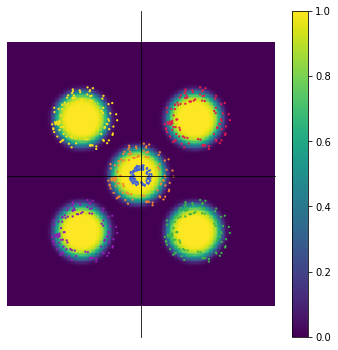

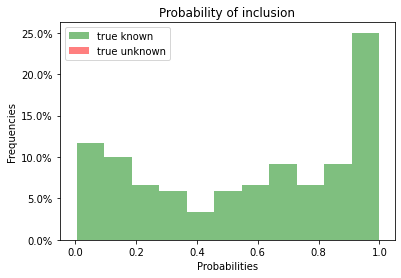

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


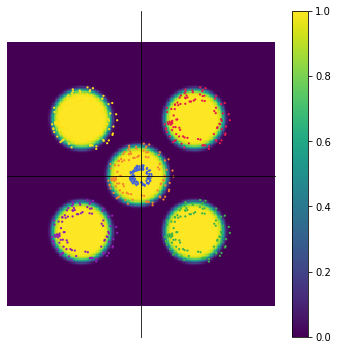

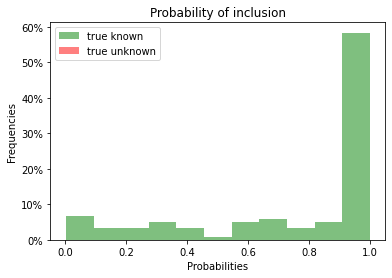

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


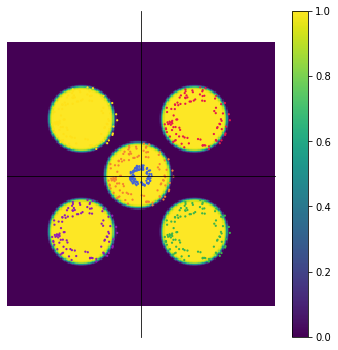

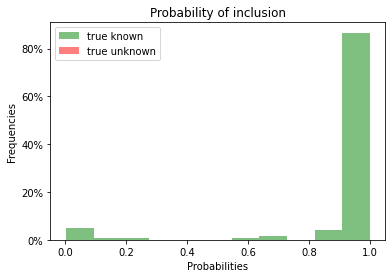

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


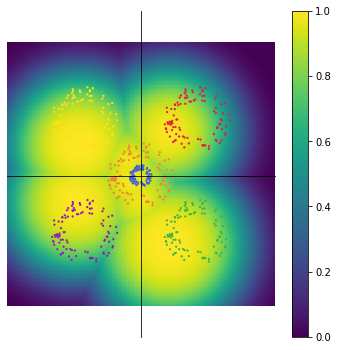

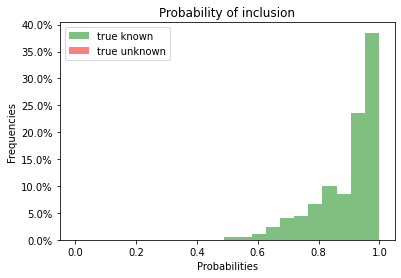

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


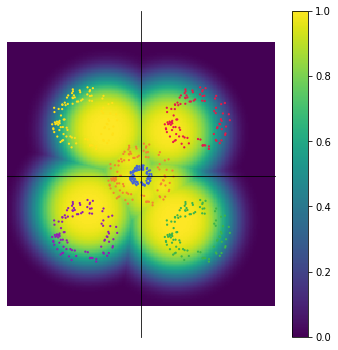

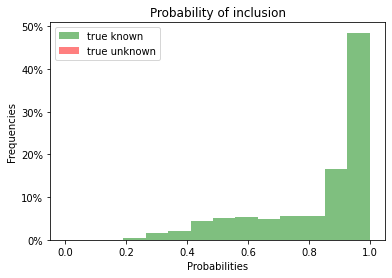

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


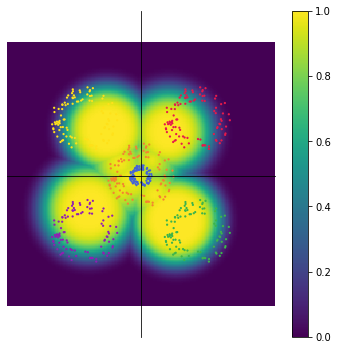

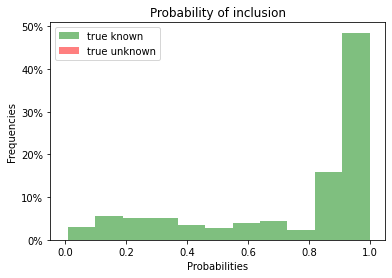

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


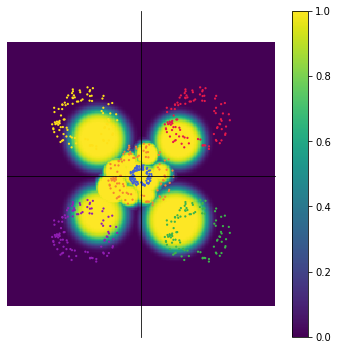

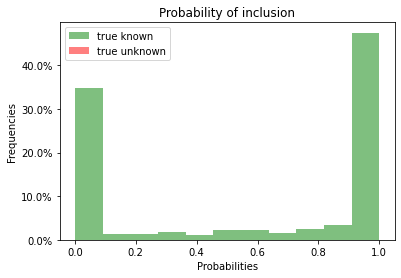

/home/amidemo/devel/workspace/object_classifier_deploy/notebooks/../evt/vast_openset.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_all_classes={'0': torch.tensor(pnts).double()},


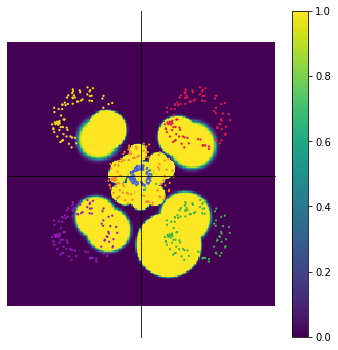

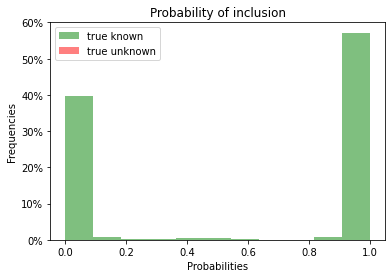

In [10]:
for (approach, algorithm_parameters) in example_configurations:
    saver_parameters = f"--OOD_Algo {approach}"
    model_params = OpensetModelParameters(approach, algorithm_parameters, saver_parameters)

    trainer = OpensetTrainer(training_data, model_params)

    trainer.train()
    trainer.plot(testing_data)